# Report for Homework Excercise 1 - Ben-Jasper Kettlitz [E11215002]

First we introduce the torch package into our scope. We also set the random seed to a fixed value to ensure reproducibility.

In [56]:
import pandas as pd
import numpy as np

RANDOM_SEED = 1234
np.random.seed(RANDOM_SEED)

import matplotlib.pyplot as plt 


In [53]:
class SinglePerceptron():


    def __init__(self):
        self.activation_function = lambda x: 1 if x >= 0 else -1
        self.bias = -1
        self.weights = np.array([-1.0, 1.0])
        self.learning_rate = 0.5
        self.epochs = 1

    def predict(self, x):
        return self.activation_function(np.dot(x, self.weights) - self.bias)

    def train(self, x_train: np.array, y_train):

        for i in range(self.epochs):
            for x,label in zip(x_train, y_train):
                print(f"Epoch: {i}, x: {x}, y: {label}")
                prediction = self.predict(x)
                if prediction != label:
                    weights_update = self.learning_rate * (label - prediction) * x
                    self.weights += weights_update
                    
                    self.bias += self.learning_rate * (label - prediction) * self.bias
                else:
                    pass
                
                
    def __str__(self) -> str:
        return f"Perceptron with parameters weights: {self.weights}, bias: {self.bias}"
        
        
class SinglePerceptron2():


    def __init__(self):
        self.activation_function = lambda x: 1 if x >= 0 else -1
        self.bias = -1
        self.weights = np.array([-1.0, 1.0])
        self.learning_rate = 0.5
        self.epochs = 1

    def predict(self, x):
        return self.activation_function(np.dot(x, self.weights) - self.bias)

    def train(self, x_train: np.array, y_train):

        for i in range(self.epochs):
            for x,label in zip(x_train, y_train):
                print(f"Epoch: {i}, x: {x}, y: {label}")
                prediction = self.predict(x)
                if prediction > 0:
                    weights_update = self.learning_rate * (label - prediction) * x
                    bias_update = self.learning_rate * (label - prediction) * self.bias
                if prediction < 0:
                    weights_update = self.learning_rate * (label - prediction) * x
                    bias_update = self.learning_rate * (label - prediction) * self.bias
                else:
                    pass
                
                
    def __str__(self) -> str:
        return f"Perceptron with parameters weights: {self.weights}, bias: {self.bias}"
        

Epoch: 0, x: [2 0], y: [-1]
Epoch: 0, x: [2 2], y: [-1]
Epoch: 0, x: [1 3], y: [-1]
Epoch: 0, x: [-1  0], y: [1]
Epoch: 0, x: [-2  0], y: [1]
Epoch: 0, x: [-1  2], y: [1]


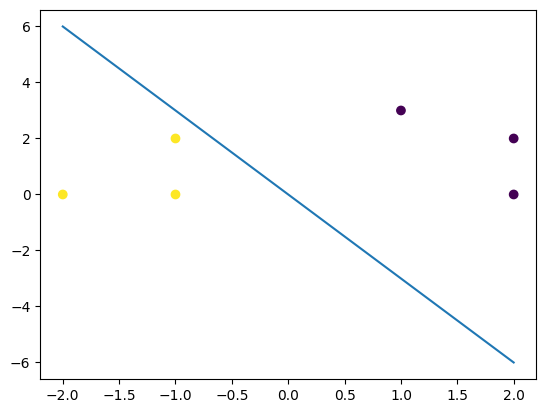

In [59]:
perceptron = SinglePerceptron()
x_train = np.array([[2,0],[2,2],[1,3],[-1,0], [-2,0], [-1,2]])
y_train = np.array([[-1],[-1],[-1],[1],[1],[1]])


perceptron.train(x_train, y_train)

str(perceptron)

# plot the data

plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
# decision boundary
x = np.linspace(-2,2,100)
y = -perceptron.weights[0]/perceptron.weights[1] * x + perceptron.bias/perceptron.weights[1] 
plt.plot(x,y)
plt.show()